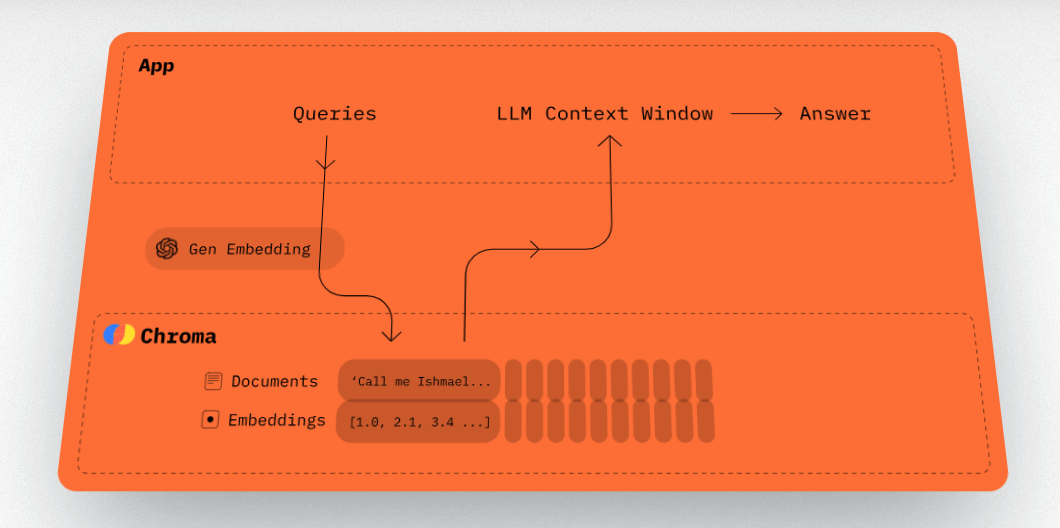

## Introduction to Vector Stores in LangChain
Vector databases store high-dimensional embeddings that help retrieve similar content efficiently. This notebook covers **FAISS** and **ChromaDB**, two powerful vector stores, and shows how to use them with LangChain.

We'll go through:
- Setting up FAISS and ChromaDB
- Indexing and storing embeddings
- Querying the stored vectors to retrieve relevant results.

In [ ]:
!pip install -qU  langchain-openai langchain_community langchain
!pip install -qU  faiss-cpu Chromadb
!pip install -qU  html2text "unstructured[all-docs]" pdfplumber


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing meta

## Setting Up FAISS & ChromaDB
We need to install and import the necessary libraries before working with vector databases.

In [ ]:
from langchain.vectorstores import FAISS
from langchain.vectorstores import Chroma

In [ ]:
texts = [
    """حضور امیرکبیر در دربار ناصرالدین‌شاه همواره مورد مخالفت تعدادی از نزدیکان شاه از جمله مهد علیا،
     مادر شاه و اعتمادالدوله (میرزا آقاخان نوری) قرار داشت؛
    چنان‌که تلاش‌های این عده سرانجام منجر به صدور حکم عزل امیرکبیر از مقام خود شد
    . برخی از درباریان که او را مخالف منافع خود می‌دیدند، تهمت زدند که امیرکبیر داعیه سلطنت دارد.""",

    """روز ۳۰ آبان، فردای دستگیری، امیرکبیر از تمامی مناصب خلع شد و دو روز بعد به عنوان یک زندانی به کاشان فرستاده شد.
     این تبعید ۴۰ روز به طول انجامید.
     به نگهبانان دستور داده شده بود که با کمال احترام با او رفتار کنند.
     با این حال همسر وزیر مختار انگلیس که خارج از شهر با کاروان حامل امیر برخورد داشته
      می‌نویسد که سرنوشت او را به راحتی می‌شد حدس زد""",
    """ به روایت میرزا محمد جعفر خان حقایق نگار خورموجی در کتاب مشهور حقایق‌الخبار ناصری
     روز بعد از قتل جسدش را در گورستان پشت مشهد کاشان (در نزدیکی امامزاده حبیب بن موسی) به خاک سپردند.
      اما چند ماه بعد، به اصرار همسرش عزت‌الدوله کالبدش را به کربلا منتقل کردند
       و در اتاقی که در آن به سوی حرم امام حسین باز می‌شد به خاک سپردند.""",
        """ به روایت میرزا محمد جعفر خان حقایق نگار خورموجی در کتاب مشهور حقایق‌الخبار ناصری
     روز بعد از قتل جسدش را در گورستان پشت مشهد کاشان (در نزدیکی امامزاده حبیب بن موسی) به خاک سپردند.
      اما چند ماه بعد، به اصرار همسرش عزت‌الدوله کالبدش را به کربلا منتقل کردند
       و در اتاقی که در آن به سوی حرم امام حسین باز می‌شد به خاک سپردند.""",

]

In [ ]:
len(texts)

4

In [ ]:
from google.colab import userdata
openai_api_key = userdata.get('openai_api_key')

In [ ]:
# from langchain.embeddings.openai import OpenAIEmbeddings
from langchain_openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings(openai_api_key=openai_api_key)


In [ ]:
db = FAISS.from_texts(texts, embedding)

In [ ]:
dir(db)

['_FAISS__add',
 '_FAISS__from',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_aembed_documents',
 '_aembed_query',
 '_asimilarity_search_with_relevance_scores',
 '_cosine_relevance_score_fn',
 '_create_filter_func',
 '_embed_documents',
 '_embed_query',
 '_euclidean_relevance_score_fn',
 '_get_retriever_tags',
 '_max_inner_product_relevance_score_fn',
 '_normalize_L2',
 '_select_relevance_score_fn',
 '_similarity_search_with_relevance_scores',
 'aadd_documents',
 'aadd_texts',
 'add_documents',
 'add_embeddings',
 'add_texts',
 'adelete',
 'afrom_documents',
 'afrom_embeddings

In [ ]:
result = db.similarity_search('مهدعلیا', k=2)

In [ ]:
result

[Document(id='7cdc50e0-7cb7-43d0-8c5e-06d2dc8168a0', metadata={}, page_content='حضور امیرکبیر در دربار ناصرالدین\u200cشاه همواره مورد مخالفت تعدادی از نزدیکان شاه از جمله مهد علیا،\n     مادر شاه و اعتمادالدوله (میرزا آقاخان نوری) قرار داشت؛\n    چنان\u200cکه تلاش\u200cهای این عده سرانجام منجر به صدور حکم عزل امیرکبیر از مقام خود شد\n    . برخی از درباریان که او را مخالف منافع خود می\u200cدیدند، تهمت زدند که امیرکبیر داعیه سلطنت دارد.'),
 Document(id='d89aca56-b421-49b6-b47b-0d392213150a', metadata={}, page_content=' به روایت میرزا محمد جعفر خان حقایق نگار خورموجی در کتاب مشهور حقایق\u200cالخبار ناصری\n     روز بعد از قتل جسدش را در گورستان پشت مشهد کاشان (در نزدیکی امامزاده حبیب بن موسی) به خاک سپردند.\n      اما چند ماه بعد، به اصرار همسرش عزت\u200cالدوله کالبدش را به کربلا منتقل کردند\n       و در اتاقی که در آن به سوی حرم امام حسین باز می\u200cشد به خاک سپردند.')]

In [ ]:
from langchain.docstore.document import Document

doc_example =  Document(page_content="text", metadata={"source": "local", "title":'shoes'})

In [ ]:
db.similarity_search_with_relevance_scores('مهدعلیا', k=2)

[(Document(id='7cdc50e0-7cb7-43d0-8c5e-06d2dc8168a0', metadata={}, page_content='حضور امیرکبیر در دربار ناصرالدین\u200cشاه همواره مورد مخالفت تعدادی از نزدیکان شاه از جمله مهد علیا،\n     مادر شاه و اعتمادالدوله (میرزا آقاخان نوری) قرار داشت؛\n    چنان\u200cکه تلاش\u200cهای این عده سرانجام منجر به صدور حکم عزل امیرکبیر از مقام خود شد\n    . برخی از درباریان که او را مخالف منافع خود می\u200cدیدند، تهمت زدند که امیرکبیر داعیه سلطنت دارد.'),
  0.74513273869856),
 (Document(id='d89aca56-b421-49b6-b47b-0d392213150a', metadata={}, page_content=' به روایت میرزا محمد جعفر خان حقایق نگار خورموجی در کتاب مشهور حقایق\u200cالخبار ناصری\n     روز بعد از قتل جسدش را در گورستان پشت مشهد کاشان (در نزدیکی امامزاده حبیب بن موسی) به خاک سپردند.\n      اما چند ماه بعد، به اصرار همسرش عزت\u200cالدوله کالبدش را به کربلا منتقل کردند\n       و در اتاقی که در آن به سوی حرم امام حسین باز می\u200cشد به خاک سپردند.'),
  0.7272876576719262)]

In [ ]:
url = 'https://fa.wikipedia.org/wiki/%D8%A7%D9%85%DB%8C%D8%B1%DA%A9%D8%A8%DB%8C%D8%B1'
# url = 'https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird'
from langchain.document_loaders import AsyncHtmlLoader

# urls = ["https://dent.umich.edu/education/internationally-trained-dentist-program-itdp"]
loader = AsyncHtmlLoader(url)
docs = loader.load()

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  6.36it/s]


In [ ]:
docs

[Document(metadata={'source': 'https://fa.wikipedia.org/wiki/%D8%A7%D9%85%DB%8C%D8%B1%DA%A9%D8%A8%DB%8C%D8%B1', 'title': 'امیرکبیر - ویکی\u200cپدیا، دانشنامهٔ آزاد', 'language': 'fa'}, page_content='<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="fa" dir="rtl">\n<head>\n<meta charset="UTF-8">\n<title>امیرکبیر - ویکی\u200cپدیا، دانشنامهٔ آزاد</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled v

In [ ]:
from langchain_community.document_transformers import Html2TextTransformer

html2text = Html2TextTransformer()
docs_transformed = html2text.transform_documents(docs)
docs_transformed[0].page_content

'پرش به محتوا\n\nمنوی اصلی\n\nمنوی اصلی\n\nانتقال به نوار کناری نهفتن\n\nبازدید محتوا\n\n  * صفحهٔ اصلی\n  * رویدادهای کنونی\n  * مقالهٔ تصادفی\n\nهمکاری\n\n  * تغییرات اخیر\n  * ویکی\u200cنویس شوید!\n  * راهنما\n  * تماس با ویکی\u200cپدیا\n\nجستجو\n\nجستجو\n\nظاهر\n\n  * کمک مالی\n  * ساخت حساب\n  * ورود\n\nابزارهای شخصی\n\n  * کمک مالی\n  * ساخت حساب\n  * ورود\n\nصفحه\u200cهایی برای ویرایشگرانی که از سامانه خارج شدند بیشتر بدانید\n\n  * مشارکت\u200cها\n  * بحث\n\n## فهرست\n\nانتقال به نوار کناری نهفتن\n\n  * بخش آغازین\n\n  * ۱ زندگی\n\nتغییر وضعیت زیربخش\u200cهای زندگی\n\n    * ۱.۱ کودکی\n\n    * ۱.۲ ازدواج و فرزندان\n\n    * ۱.۳ دولتمردی و صدارت\n\n    * ۱.۴ عنوان\u200cهای امیر کبیر\n\n  * ۲ اقدامات و رخدادها\n\nتغییر وضعیت زیربخش\u200cهای اقدامات و رخدادها\n\n    * ۲.۱ تأسیس مدرسهٔ دارالفنون\n\n    * ۲.۲ انتشار روزنامه وقایع اتفاقیه\n\n    * ۲.۳ رسیدگی به وضع مالیه\n\n    * ۲.۴ حذف القاب و عنوان\u200cها\n\n    * ۲.۵ رفتار با درباریان\n\n    * ۲.۶ اصلاحات اجتماعی\n\n    * ۲.۷ ایجاد

In [ ]:
len(docs_transformed[0].page_content)

70736

In [ ]:
docs_transformed[0]

In [ ]:
docs_transformed[0].metadata

{'source': 'https://fa.wikipedia.org/wiki/%D8%A7%D9%85%DB%8C%D8%B1%DA%A9%D8%A8%DB%8C%D8%B1',
 'title': 'امیرکبیر - ویکی\u200cپدیا، دانشنامهٔ آزاد',
 'language': 'fa'}

In [ ]:
from langchain.docstore.document import Document

doc_example =  Document(page_content="text", metadata={"source": "local", "title":'shoes'})

In [ ]:
doc_example.metadata

{'source': 'local', 'title': 'shoes'}

In [ ]:
! pip install -q docx2txt

  Preparing metadata (setup.py) ... done


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import Docx2txtLoader
loader = Docx2txtLoader('/content/gdfm.docx')
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
text_chunks = text_splitter.split_documents(docs_transformed)

In [ ]:
len(text_chunks)

97

In [ ]:
docs = loader.load()
docs[0].page_content

'Sure! Let\'s dive into the empirical application of the **Generalized Dynamic Factor Model (GDFM)**, using the example in the paper. We\'ll explore how the model works, how it distinguishes between system-wide (common) shocks and idiosyncratic (individual) shocks, and discuss the overall process—from input to preprocessing to output.\n\n\n\n### **Empirical Application of GDFM: Analyzing US States\' Output Growth**\n\nIn the paper, the authors apply the **Generalized Dynamic Factor Model** to a panel of annual real output growth data of 49 US states, covering the period from 1948 to 1993. The goal here is to identify the "national component" of the US business cycle, which can be considered the **system-wide shock**, and to distinguish it from the **idiosyncratic shocks** unique to each state. This is a practical use case that helps us understand how the GDFM can be used in stress testing and macroeconomic analysis.\n\n\n\n#### **1. Model Components: System-wide vs. Idiosyncratic Shock

In [ ]:
len(docs[0].page_content)

11599

In [ ]:
for chunk in text_chunks:
  print(len(chunk.page_content))
  if len(chunk.page_content)>1000:
    print('length is over than 1000', chunk.page_content)
    # break



In [ ]:
text_chunks[0]

Document(metadata={'source': 'https://fa.wikipedia.org/wiki/%D8%A7%D9%85%DB%8C%D8%B1%DA%A9%D8%A8%DB%8C%D8%B1', 'title': 'امیرکبیر - ویکی\u200cپدیا، دانشنامهٔ آزاد', 'language': 'fa'}, page_content='پرش به محتوا\n\nمنوی اصلی\n\nمنوی اصلی\n\nانتقال به نوار کناری نهفتن\n\nبازدید محتوا\n\n  * صفحهٔ اصلی\n  * رویدادهای کنونی\n  * مقالهٔ تصادفی\n\nهمکاری\n\n  * تغییرات اخیر\n  * ویکی\u200cنویس شوید!\n  * راهنما\n  * تماس با ویکی\u200cپدیا\n\nجستجو\n\nجستجو\n\n  * کمک مالی\n\nظاهر\n\n  * ایجاد حساب\n  * ورود\n\nابزارهای شخصی\n\n  * ایجاد حساب\n  * ورود\n\nصفحه\u200cهایی برای ویرایشگرانی که از سامانه خارج شدند بیشتر بدانید\n\n  * مشارکت\u200cها\n  * بحث\n\n## فهرست\n\nانتقال به نوار کناری نهفتن\n\n  * بخش آغازین\n\n  * ۱ زندگی\n\nتغییر وضعیت زیربخش\u200cهای زندگی\n\n    * ۱.۱ کودکی\n\n    * ۱.۲ ازدواج و فرزندان\n\n    * ۱.۳ دولتمردی و صدارت\n\n    * ۱.۴ عنوان\u200cهای امیر کبیر\n\n  * ۲ اقدامات و رخدادها\n\nتغییر وضعیت زیربخش\u200cهای اقدامات و رخدادها\n\n    * ۲.۱ تأسیس مدرسهٔ دارالفنون\n\n  

In [ ]:
db.add_documents(text_chunks)

['7331c054-4af3-4ce0-a530-8f92ddb9f776',
 'c0f3134c-86bd-46a0-bb3d-96e177b17e3e',
 '68d9fd79-f3c2-4072-9370-ca54acfe65f2',
 'dd6ee6d4-e4bc-4701-9fff-db15693d2d89',
 'c16db4e7-3cc8-4e72-8934-3f45db7108eb',
 'b8ea505e-83af-4080-bac9-f513ea74a9a6',
 'a248de7e-ee4f-48d7-9192-00760fcf5ccc',
 '904d527e-9bc9-481e-b0b6-e24b40bbef26',
 '0a75407b-e42d-4908-a55c-993ee3ed8f22',
 'eb2d0121-92d2-4f44-b489-98ab8c72f820',
 '099d0a90-1f9e-4097-a393-e091f12c4338',
 '821ff212-20fa-4c72-9e30-cc4f0d002a96',
 '3e97b499-5223-472e-b027-1eaa7d198cae',
 'eb99e7a9-06c3-4e83-bf39-d9839b39130c',
 'e79f062b-059d-402e-9af3-07c275eef4e2',
 'baddd65d-2a0c-45d2-8a98-9c5fee45fc91',
 'b7a6d23a-db67-4285-b60e-a9a22415d4d2',
 'c4b0eccb-5a0f-46c6-8cd2-bda5009c6d89',
 'f3caa15d-6c95-44cd-93e0-9534b6b20cf7',
 '452d198a-be81-4695-ae23-827e973bce51',
 'fe98c169-1eb3-4073-bf54-6c4bfd1893c1',
 '8772759b-b494-49f8-a184-2ce50921e7fc',
 '46018003-ac34-446d-bd8c-90738419fa23',
 '21a7cce2-7a65-4c75-90a7-872230368a84',
 '37ef9402-20e8-

In [ ]:
dir(db)

In [ ]:
db.search('مهد علیا', search_type='mmr', k=1)

[Document(id='821ff212-20fa-4c72-9e30-cc4f0d002a96', metadata={'source': 'https://fa.wikipedia.org/wiki/%D8%A7%D9%85%DB%8C%D8%B1%DA%A9%D8%A8%DB%8C%D8%B1', 'title': 'امیرکبیر - ویکی\u200cپدیا، دانشنامهٔ آزاد', 'language': 'fa'}, page_content='محمد شاه در شب شنبه چهارم سپتامبر ۱۸۴۸ میلادی فوت کرد. کاردار سفارت انگلیس با\nفرستادن پیکی این خبر را به ناصر\u200cالدین میرزا در تبریز رساند. میرزا فضل\u200cالله\nنصیرالملک پیشکار ناصرالدین شاه در مهیا کردن مقدمات حرکت شاه به تهران درماند و\nمیرزا تقی خان مأمور به این کار شد.')]

In [ ]:
len(db.embeddings.embed_query(texts[0]))

1536

In [ ]:
len(db.embeddings.embed_query(texts[0]))

1536

In [ ]:
vs = Chroma.from_documents(text_chunks, embedding)

In [ ]:
len(text_chunks)

97

In [ ]:
len(vs.get()['documents'])

97

In [ ]:
len(text_chunks)

128

In [ ]:
vs.get()['ids']

['b226420c-5fa6-4225-8792-2ac1ed033a84',
 'd3727da0-78e7-44ac-8e9b-da6b4211f765',
 '88c27279-62e5-4490-ad76-5f131aabeb3c',
 '5bdcee1d-5856-4988-9fa6-0036d0f347ba',
 'efdb277c-bdea-439b-a027-f1a05118b1e0',
 '4713ad82-1c10-41ae-893d-4bd705d3eab3',
 'fdc01e37-4433-4aa2-ab81-a42bd35b1cd6',
 '54ef8b13-1ce4-4f29-8604-32f7e5fa6336',
 '0329f56e-7949-4920-b051-c09e7d96b78d',
 'd7c067d3-0df9-44ad-9452-aa9a74516950',
 '8309dff8-ccb1-4c96-a742-d3be34c0e449',
 '37277c1e-8217-499c-884e-0598b0729ee6',
 'f2901692-76d1-433a-9a0e-0351882d8c77',
 'a59ec416-eda5-498a-9ed0-24327db732b4',
 '24602a3f-a701-4180-82be-2606ed6e1b1c',
 '4ed9f41e-42e9-472d-9cfc-17a95d85f230',
 'bf7f8bba-4a2c-468f-a198-9d0e50a1c04f',
 'cb7b4ff3-f03e-4b97-9b71-4ee51472f2ea',
 '03626d52-b112-4041-b149-cbc257b438ca',
 'ca56d51e-5793-4c24-abe0-725eea8acb06',
 '46b468de-e149-4c2e-9530-0feb2c777bda',
 '4a48b2ad-f749-4e98-9577-5d9d051feb31',
 'd2272b7a-7a19-48e2-9f42-ffe97935e132',
 'cdc5e772-8d71-4aee-8e34-71ba8a03768b',
 '00ad2477-edc4-

In [ ]:
# vs.embeddings.embed_query(
ids = vs.get()['ids']
(vs.embeddings.embed_query(vs.get(ids[0])['documents'][0])
)

In [ ]:
db.save_local('/content/faiss_example')

In [ ]:
db_2 = FAISS.load_local('/content/faiss_example', embedding, allow_dangerous_deserialization=True)

In [ ]:
db_2.similarity_search('مهد علیا', k=1)

[Document(id='821ff212-20fa-4c72-9e30-cc4f0d002a96', metadata={'source': 'https://fa.wikipedia.org/wiki/%D8%A7%D9%85%DB%8C%D8%B1%DA%A9%D8%A8%DB%8C%D8%B1', 'title': 'امیرکبیر - ویکی\u200cپدیا، دانشنامهٔ آزاد', 'language': 'fa'}, page_content='محمد شاه در شب شنبه چهارم سپتامبر ۱۸۴۸ میلادی فوت کرد. کاردار سفارت انگلیس با\nفرستادن پیکی این خبر را به ناصر\u200cالدین میرزا در تبریز رساند. میرزا فضل\u200cالله\nنصیرالملک پیشکار ناصرالدین شاه در مهیا کردن مقدمات حرکت شاه به تهران درماند و\nمیرزا تقی خان مأمور به این کار شد.')]

In [ ]:
from langchain_community.document_loaders import UnstructuredFileLoader

loader = UnstructuredFileLoader("/content/attention.pdf")
docs = loader.load()




<ipython-input-68-af8ad40f315d>:3: LangChainDeprecationWarning: The class `UnstructuredFileLoader` was deprecated in LangChain 0.2.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-unstructured package and should be used instead. To use it run `pip install -U :class:`~langchain-unstructured` and import as `from :class:`~langchain_unstructured import UnstructuredLoader``.
  loader = UnstructuredFileLoader("/content/attention.pdf")


FileNotFoundError: no such file /content/attention.pdf

In [ ]:
docs[0].page_content

'<!DOCTYPE html><html lang="en"><head><script>var ue_t0=window.ue_t0||+new Date();(function(e){var c=e,a={main_scope:"mainscopecsm",q:[],t0:c.ue_t0||+new Date(),d:g};function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}function b(k,j,h){var i={m:k,f:j,l:h,fromOnError:1,args:arguments};c.ueLogError(i);return false}b.skipTrace=1;e.onerror=b;function f(){c.uex("ld")}if(e.addEventListener){e.addEventListener("load",f,false)}else{if(e.attachEvent){e.attachEvent("onload",f)}}a.tag=d("tag");a.log=d("log");a.reset=d("rst");c.ue_csm=c;c.ue=a;c.ueLogError=d("err");c.ues=d("ues");c.uet=d("uet");c.uex=d("uex");c.uet("ue")})(window);(function(e,d){var a=e.ue||{};function c(g){if(!g){return}var f=d.head||d.getElementsByTagName("head")[0]||d.documentElement,h=d.createElement("script");h.async="async";h.src=g;f.insertBefore(h,f.firstChild)}function b(){var k=e.ue_cdn||"z-ecx.images-amazon.com",g=e.ue_cdns||"images-na.ssl-images-amazon.com",j=

In [ ]:
docs[0].metadata

{'source': '/content/attention.pdf'}

In [ ]:
loader = UnstructuredFileLoader(
   "/content/attention.pdf", mode="elements"
)
docs = loader.load()


{'source': '/content/attention.pdf',
 'coordinates': {'points': ((107.532, 202.90011719999995),
   (107.532, 227.6919216),
   (302.96132786, 227.6919216),
   (302.96132786, 202.90011719999995)),
  'system': 'PixelSpace',
  'layout_width': 612,
  'layout_height': 792},
 'file_directory': '/content',
 'filename': 'attention.pdf',
 'languages': ['eng'],
 'last_modified': '2024-02-10T10:44:01',
 'page_number': 5,
 'parent_id': '254bce889c65e7d964e2106a5b2640f9',
 'filetype': 'application/pdf',
 'category': 'NarrativeText'}

In [ ]:
docs[100]

Document(page_content='where pos is the position and i is the dimension. That is, each dimension of the positional encoding corresponds to a sinusoid. The wavelengths form a geometric progression from 2π to 10000 · 2π. We chose this function because we hypothesized it would allow the model to easily learn to attend by relative positions, since for any fixed offset k, P Epos+k can be represented as a linear function of P Epos.', metadata={'source': '/content/attention.pdf', 'coordinates': {'points': ((107.641, 377.0471444), (107.641, 431.55991720000003), (504.3427135559997, 431.55991720000003), (504.3427135559997, 377.0471444)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'attention.pdf', 'languages': ['eng'], 'last_modified': '2024-02-09T20:09:19', 'page_number': 6, 'parent_id': 'e1dfdc6a93a6e12427797bcd880aefe6', 'filetype': 'application/pdf', 'category': 'NarrativeText'})

In [ ]:
vs = FAISS.from_documents(docs, embedding)

In [ ]:
vs.similarity_search('decoder stack layer', k=2)

[Document(page_content='3.1 Encoder and Decoder Stacks', metadata={'source': '/content/attention.pdf', 'coordinates': {'points': ((108.0, 482.7575834), (108.0, 492.7201834), (253.00564300000005, 492.7201834), (253.00564300000005, 482.7575834)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'attention.pdf', 'languages': ['eng'], 'last_modified': '2024-02-10T10:44:01', 'page_number': 3, 'filetype': 'application/pdf', 'category': 'Title'}),
 Document(page_content='Decoder: The decoder is also composed of a stack of N = 6 identical layers. In addition to the two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head attention over the output of the encoder stack. Similar to the encoder, we employ residual connections around each of the sub-layers, followed by layer normalization. We also modify the self-attention sub-layer in the decoder stack to prevent positions from attending to s

In [ ]:
from langchain.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader( "/content/attention.pdf")
docs = loader.load()

In [ ]:
len(docs)

15

In [ ]:

## Querying FAISS Database

query = "Example search query related to AI"
retrieved_docs = faiss_db.similarity_search(query, k=3)

print("Top 3 results from FAISS:")
for doc in retrieved_docs:
    print(doc.page_content)

## Querying ChromaDB Database

retrieved_docs_chroma = chroma_db.similarity_search(query, k=3)

print("Top 3 results from ChromaDB:")
for doc in retrieved_docs_chroma:
    print(doc.page_content)
